## Statistical Inference (two populations)

In this demonstration, we'll understand how to draw statistical inferences with two samples drawn from different populations. 
We will be interested in:
- Determining whether the population means are different.
- Constructing confidence intervals for the difference in population means. 
---

## Demonstration Overview

- Problem Statement Discussion
- Data Preparation and Exploratory Data Analysis
- Hypothesis Testing for Difference in Means
    - Independent Samples
        - Equal variances
        - Unequal variances
    - Paired Samples
    
---

### Problem Statement

A restaurant chain is interested in knowing whether a new storefront look and employee uniforms can improve sales. For conducting this experiment, 2 restaurant stores are chosen with similar location and similar performance for the treatment and the control groups. Here's an overview

**Treatment Group**
- *Store Owner*: Andy
- *Changes made*: New Storefront look, employee uniforms

**Control Group**
- *Store Ower*: Bob
- *Changes made*: No changes

We use a 14 day testing period to estimate which storefront look does "*better*"

Now let's go ahead and analyze the dataset 

---

### Data Preparation and EDA

In [1]:
### Import the libraries
import pandas as pd
import seaborn as sns

In [2]:
##Import the dataset
df = pd.read_excel("TwoSample.xlsx")
df.head()

,Day,Andy,Bob
0,Tuesday,981,933
1,Friday,1932,1827
2,Tuesday,873,825
3,Thursday,1338,1281
4,Sunday,1349,1267


Let's prepare a few visualizations to analyze the data

<Axes: >

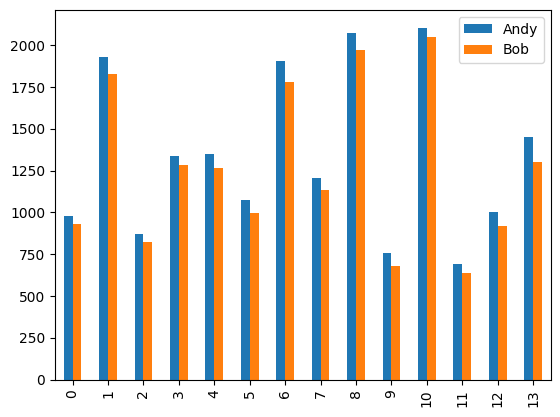

In [3]:
## We can observe the day wise trends for both Andy and Bob
df.plot(kind = 'bar')

- The sales pattern is almost identical for both Andy's and Bob's stores
- The peaks that we observe are during the Fri-Sun period
- Also, for each of the days, we observe that Andy's store is always performing slightly better than Bob's. This gives an early indication that the treatment group is perfoming better than the control group


Next, let's compare the sales distributions for both the stores

In [4]:
## We shall use a boxplot for this
## You can directly pass the DataFrame as an argument and the sns.boxplot function would only consider the numeric columns
## Which in this case are the columns 'Andy' and 'Bob'

<Axes: >

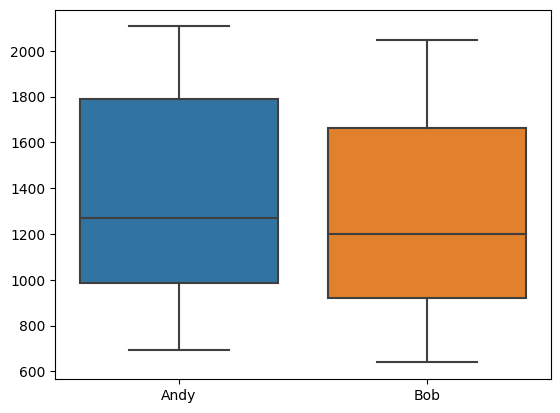

In [5]:
sns.boxplot(data = df) 

We can see that the median sales in Andy's store is slightly better than Bob's 

In [6]:
#Quick calculation
df['Andy'].mean() - df['Bob'].mean()

81.21428571428578

Average sales for Andy are about $81 more

In [7]:
## We can also add a column that computes the pair-wise differences
df['Difference'] = df['Andy'] - df['Bob']

In [ ]:
df.head()

Let's obtain some more descriptive statistics for both the restaurants

In [ ]:
pd.options.display.float_format = "{:,.2f}".format ## to keep only upto 2 decimal points
df.describe()

**Summary**

- From the above analysis, it's clear that Andy's store is performing better than Bob's 
- On average, Andy's store earns **$81** more than Bob's store
- Our next step is to check whether this difference is statistically significant or not

---

###  Hypothesis Testing for Difference in Means

**Independent Samples**
- Equal variances

We shall start with conducting t-tests for difference in means using *scipy*. Assumes independent samples and equality of variance across populations. 

The hypotheses are as follows. 

> Let $\mu_1$ be the mean for Andy and $\mu_2$ the mean for Bob.

$$H_0: \mu_1-\mu_2 = 0$$
$$H_a: \mu_1-\mu_2 \neq 0$$

> This will be a two-sided test, with $\alpha$ = 0.05

In [ ]:
from scipy.stats import ttest_ind

In [ ]:
##A quick look at the documentation of the ttest_ind method
?ttest_ind

*As shown in the documentation, we shall be providing the following inputs*

- *Andy's sales*
- *Bob's sales*
- *equal_var* argument set to *True*

In [ ]:
## Run the t-test
ttest_ind(df.Andy, df.Bob, equal_var=True)

Ttest_indResult(statistic=0.44523214069369493, pvalue=0.6598369595940106)

Since p-value for the given test comes out as 0.66 (which is greater than $\alpha$), we fail to reject the null hypothesis, which states that there's no difference in the means of Andy's and Bob's store sales.

---

- Unequal variances

Next, we can run the test, without the equal variance assumption

In [ ]:
ttest_ind(df.Andy, df.Bob, equal_var=False)

Ttest_indResult(statistic=0.44523214069369493, pvalue=0.6598396576346227)

We reach the same conclusion here as well

In [ ]:
### Additional Code
### To test equality of variances

from scipy.stats import bartlett

# Bartlett's test of equality of variances
bartlett(df.Andy, df.Bob)

BartlettResult(statistic=0.009225415343954173, pvalue=0.923481635617045)

---

**Paired Samples**

In [ ]:
##Reiterating the need for using paired samples
## Plot a scatterplot between Andy's sales and Bob's sales

<AxesSubplot:xlabel='Bob', ylabel='Andy'>

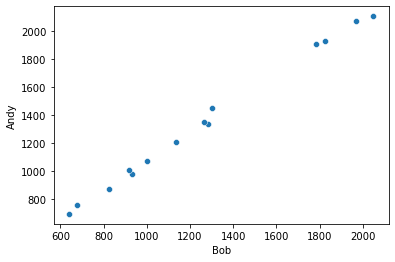

In [ ]:
sns.scatterplot(y = df.Andy, x = df.Bob)

- We can clearly see that there is a nearly linear relationship between Andy's and Bob's sales 

- Hence we can conclude that they are highly correlated. This violates the independence assumption

**Solution**: To get rid of the correlation, we can compute the pair-wise differences for Andy's and Bob's sales for each day of the week and then perform hypothesis tests

In the next section, we shall look at multiple ways to perform the hypothesis tests for paired samples

##### Using one-sample t-test on the Difference column

We already have computed the "Difference" column. We can use it to perform hypothesis tests.

Our hypotheses changes *a little bit*

> Let $\mu_d$ denote the difference in means for sales in Andy's and Bob's restaurants 

> Our original hypotheses that was shown previously changes to 

$$H_0: \mu_d = 0$$
$$H_a: \mu_d \neq 0$$

> This will still be a two-sided test, with $\alpha$ = 0.05

In [5]:
## We can peform a one-sample t-test on the 'Difference' column
from scipy.stats import ttest_1samp

In [6]:
##Let's check the documentation 
?ttest_1samp

*As shown in the documentation, we shall be providing the following inputs*

- *Difference in sales between Andy and Bob*
- *Population mean for difference in sales as per null hypothesis*

In [ ]:
ttest_1samp(df.Difference, popmean = 0)

Ttest_1sampResult(statistic=10.275885788346828, pvalue=1.3108746661209956e-07)

The p-value is nearly 0, indicating that the null hypothesis can be rejected.

Thus in the paired samples case, we can observe that there's significant evidence to suggest that Andy's restaurant performs better than Bob's

###### Using two-sample t-test for paired samples

In [ ]:
from scipy.stats import ttest_rel

In [ ]:
## A quick look at the ttest_rel method
?ttest_rel

*As shown in the documentation, we shall be providing the following inputs*

- *Andy's sales*
- *Bob's sales*

In [ ]:
# Paired sample t-test
ttest_rel(df.Andy, df.Bob)

Ttest_relResult(statistic=10.275885788346828, pvalue=1.3108746661209956e-07)

We observe the same result as seen previously

##### Using paired t-test in Pingouin

*Pingouin* is an open-source statistical package written in Python 3 and based mostly on Pandas and NumPy. It provides slightly more exhaustive statistical information by default as compared to the methods in the *scipy.stats* package

Read more: https://pingouin-stats.org/

In [ ]:
##Install pingouin if it's not already there in the system
!pip install pingouin

In [3]:
##Import the library
import pingouin as pg

ModuleNotFoundError: ignored

We shall be using the *pg.ttest* method. Let's check its documentation to understand the different arguments

In [4]:
?pg.ttest

Object `pg.ttest` not found.


*As shown in the documentation, we shall be providing the following inputs*

- *Andy's sales*
- *Bob's sales*
- *paired* parameter set to *True* in case of paired, else *False* by default
- *alternative* parameter set to two-sided by default

In [ ]:
## We can first conduct an unpaired test
## To verify the results we got in the independent samples case
pg.ttest(df.Andy, df.Bob)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,0.45,26,two-sided,0.66,"[-293.73, 456.16]",0.17,0.381,0.07


This is exactly the same Test Statistic (0.45) and p-value (0.66) that we got earlier when we conducted the test for independent samples.

Also you can observe additional metrics along with the above two values, such as the **CI95%**(95% confidence interval), **power**, **cohen-d** and so on

In [ ]:
## Now we can go ahead and conduct the paired test
## Here, paired will be set to True
pg.ttest(df.Andy, df.Bob, paired=True, alternative='two-sided')

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,10.28,13,two-sided,0.00,"[64.14, 98.29]",0.17,1.082e+05,0.09


Here's a summary of some key output metrics

- **Test statistic**: 10.28
- **p-val**: 0.00 which is less than $\alpha$ = 0.05, indicating we can reject the null hypothesis 
- **CI95%**: [64.14,98.29] - indicates that the difference is positive, or in other words, there's significant evidence to suggest that Andy's sales are higher than Bob's